In [1]:
#modul de carrega i de neteja de les dades, comú des de la primera pràctica

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#per realitzar les grafiques de regrassió ha estat necessari ampliar els chunks k

plt.rcParams["agg.path.chunksize"]=10000

# load dataset
names = ["Data","DayOfWeek","UniqueCarrier","Origin","Dest","AirTime","Distance","ArrDelay","DepDelay","DepTime","ArrTime","CancellationCode"]
dataframe = pd.read_csv("DelayedFlights.csv")
dataframe.dropna(inplace = True)
df1=dataframe[["DayOfWeek","UniqueCarrier","Origin","Dest","AirTime","Distance","ArrDelay","DepDelay","DepTime","ArrTime","TaxiIn","TaxiOut"]]

msk = np.random.rand(len(df1)) < 0.001

df = df1[msk]


#en la pràctica inicial es demanar carregar sols uns columnes en concret per poder analitzar, en base comentaris
#carrego totes les columnes
#df=DelayFligths_df[["Data","DayOfWeek","UniqueCarrier","Origin","Dest","AirTime","Distance","ArrDelay","DepDelay","DepTime","ArrTime","CancellationCode"]]

#millorat el procés de neteja / analisi de la qualitat en les dades
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)


df["ArrDelay"] = df['ArrDelay'].fillna(df['ArrDelay'].mean())

df["DepDelay"] = df['DepDelay'].fillna(df['DepDelay'].mean())

df["AirTime"] = df['AirTime'].fillna(df['AirTime'].mean())
df["Distance"] = df['Distance'].fillna(df['Distance'].mean())


missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)


df.dropna(inplace = True)

#esborren totes les files que segueixin contenint algun null, tot i la perdua dinformació
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)


# transformar dades categoriques

factorizables_mapping = {}
factorizable_names = ['UniqueCarrier', 'Origin', 'Dest']
for fact_name in factorizable_names:
    df[fact_name], factorizables_mapping[fact_name] = pd.factorize(df[fact_name])
#Estudi Correlació de variables
corrMatrix = df.corr()
print (corrMatrix)


               DayOfWeek  UniqueCarrier    Origin      Dest   AirTime  \
DayOfWeek       1.000000       0.028101  0.049909  0.024777 -0.012644   
UniqueCarrier   0.028101       1.000000  0.065856  0.094017  0.256582   
Origin          0.049909       0.065856  1.000000 -0.034656 -0.075130   
Dest            0.024777       0.094017 -0.034656  1.000000 -0.131699   
AirTime        -0.012644       0.256582 -0.075130 -0.131699  1.000000   
Distance       -0.008730       0.267027 -0.101074 -0.106785  0.976718   
ArrDelay        0.023453       0.018651  0.058755 -0.040542  0.045777   
DepDelay        0.021347      -0.004054  0.059252 -0.040895  0.010411   
DepTime         0.017385      -0.064711 -0.118302 -0.042322 -0.068322   
ArrTime         0.060300      -0.022657 -0.036977 -0.037879  0.028934   
TaxiIn          0.049590       0.178374  0.099244 -0.095807  0.154919   
TaxiOut        -0.013389       0.149195 -0.115797  0.051658  0.090268   

               Distance  ArrDelay  DepDelay   DepT

<ipython-input-1-0f89e3e7b311>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ArrDelay"] = df['ArrDelay'].fillna(df['ArrDelay'].mean())
<ipython-input-1-0f89e3e7b311>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DepDelay"] = df['DepDelay'].fillna(df['DepDelay'].mean())
<ipython-input-1-0f89e3e7b311>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [2]:
# Exercici 5
#Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
import math
#Mirant la matriu de correlació veiem relació entre ArrDelay i DepDelay de 0.95, i la següent variable seria TaxiOut amb un 0.20
X, y = df.loc[:, df.columns != 'ArrDelay'], df.loc[:,'ArrDelay']

# Muntem els dos jocs de proves amb el conjunt de variables

#split dataset in features and target variable
feature_cols = ["DepDelay"]
X1 = df[feature_cols] # Features
y1 = df.ArrDelay # Target variable


feature_cols = ["DepDelay","TaxiOut"]
X2 = df[feature_cols] # Features
y2 = df.ArrDelay # Target variable




# Split dataset into training set and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1) # 70% training and 30% test


#analisis dades train
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

y1_train_pred = model1.predict(X1_train)


print('MSE conjunt train model1: %.3f' % (mean_squared_error(y1_train, y1_train_pred)))
print('R^2 conjunt train model1 : %.3f' % (r2_score(y1_train, y1_train_pred)))
# Split dataset into training set and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=1) # 70% training and 30% test

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

y2_train_pred = model2.predict(X2_train)


print('MSE conjunt train model2: %.3f' % (mean_squared_error(y2_train, y2_train_pred)))
print('R^2 conjunt train model2 : %.3f' % (r2_score(y2_train, y2_train_pred)))



MSE conjunt train model1: 387.719
R^2 conjunt train model1 : 0.919
MSE conjunt train model2: 188.170
R^2 conjunt train model2 : 0.961


In [3]:
#la fiabilitat entre el primer model del segon model passa de 0.911 a 0.957 per tan hem millorat el model fem l´estudi 
#amb els algoritmes

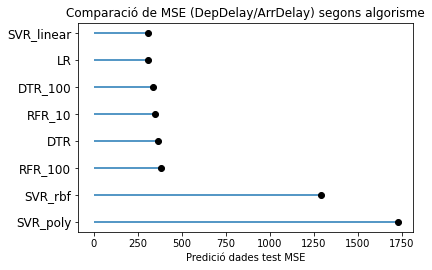

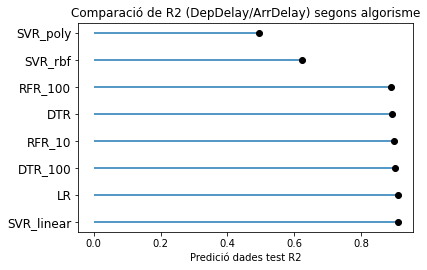

In [4]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# preparem els models a analitzar, per cada un guardem el MSE i el R2
models = []
models.append(('LR', LinearRegression()))
models.append(('SVR_rbf', SVR(kernel = 'rbf')))
models.append(('SVR_linear', SVR(kernel = 'linear')))
models.append(('SVR_poly', SVR(kernel = 'poly')))
#models.append(('SVR_sigmoid', SVR(kernel = 'sigmoid')))

models.append(('DTR', DecisionTreeRegressor(random_state=0)))
models.append(('DTR_100', DecisionTreeRegressor(random_state = 100,  max_depth = 3, min_samples_leaf = 5)))
models.append(('RFR_10', RandomForestRegressor(n_estimators = 10)))
models.append(('RFR_100', RandomForestRegressor(n_estimators = 100,max_depth=2, random_state=0)))

results1 = []
results2 = []
results = []
names = []
scoring = 'neg_mean_absolute_error'
for name, model in models:
          
    model.fit(X1_train, y1_train)

    #predicció amb les dades de test
    y1_test_pred = model.predict(X1_test)

    results1.append(mean_squared_error(y1_test, y1_test_pred))
    results2.append(r2_score(y1_test, y1_test_pred))
    names.append(name)
    
   

resultats_models = pd.DataFrame({
                        'model': names,
                        'resultat':  results1
                     })


resultats_models = resultats_models.sort_values('resultat', ascending=False)

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.hlines(resultats_models.model, xmin=0, xmax=resultats_models.resultat)
ax.plot(resultats_models.resultat, resultats_models.model, "o", color='black')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Comparació de MSE (DepDelay/ArrDelay) segons algorisme'),
ax.set_xlabel('Predició dades test MSE');



resultats_models = pd.DataFrame({
                        'model': names,
                        'resultat':  results2
                     })


resultats_models = resultats_models.sort_values('resultat', ascending=False)

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.hlines(resultats_models.model, xmin=0, xmax=resultats_models.resultat)
ax.plot(resultats_models.resultat, resultats_models.model, "o", color='black')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Comparació de R2 (DepDelay/ArrDelay) segons algorisme'),
ax.set_xlabel('Predició dades test R2');



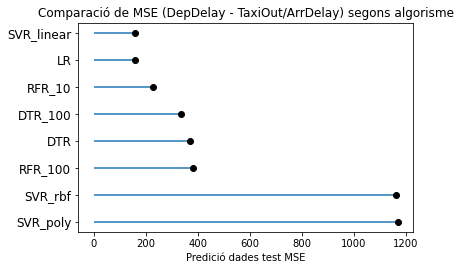

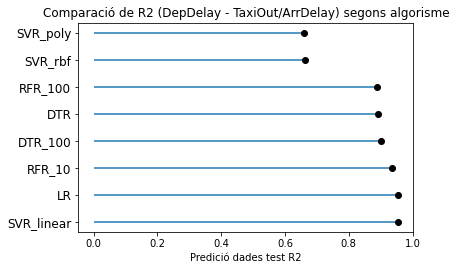

In [5]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# preparem els models a analitzar, per cada un guardem el MSE i el R2
models = []
models.append(('LR', LinearRegression()))
models.append(('SVR_rbf', SVR(kernel = 'rbf')))
models.append(('SVR_linear', SVR(kernel = 'linear')))
models.append(('SVR_poly', SVR(kernel = 'poly')))
#models.append(('SVR_sigmoid', SVR(kernel = 'sigmoid')))

models.append(('DTR', DecisionTreeRegressor(random_state=0)))
models.append(('DTR_100', DecisionTreeRegressor(random_state = 100,  max_depth = 3, min_samples_leaf = 5)))
models.append(('RFR_10', RandomForestRegressor(n_estimators = 10)))
models.append(('RFR_100', RandomForestRegressor(n_estimators = 100,max_depth=2, random_state=0)))

results1 = []
results2 = []
results = []
names = []
scoring = 'neg_mean_absolute_error'
for name, model in models:
          
    model.fit(X2_train, y2_train)

    #predicció amb les dades de test
    y2_test_pred = model.predict(X2_test)

    results1.append(mean_squared_error(y2_test, y2_test_pred))
    results2.append(r2_score(y2_test, y2_test_pred))
    names.append(name)
    
   

resultats_models = pd.DataFrame({
                        'model': names,
                        'resultat':  results1
                     })


resultats_models = resultats_models.sort_values('resultat', ascending=False)

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.hlines(resultats_models.model, xmin=0, xmax=resultats_models.resultat)
ax.plot(resultats_models.resultat, resultats_models.model, "o", color='black')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Comparació de MSE (DepDelay - TaxiOut/ArrDelay) segons algorisme'),
ax.set_xlabel('Predició dades test MSE');



resultats_models = pd.DataFrame({
                        'model': names,
                        'resultat':  results2
                     })


resultats_models = resultats_models.sort_values('resultat', ascending=False)

fig, ax = plt.subplots(figsize=(6, 3.84))
ax.hlines(resultats_models.model, xmin=0, xmax=resultats_models.resultat)
ax.plot(resultats_models.resultat, resultats_models.model, "o", color='black')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_title('Comparació de R2 (DepDelay - TaxiOut/ArrDelay) segons algorisme'),
ax.set_xlabel('Predició dades test R2');



In [6]:
#comparant les dues grafiques, es veu claramentque al afegir la variable TaxiOut l´algorisme de SVR amb model polinomic
#baixa la fiabilitat. Mentre que la resta es manté